# REGRESIÓN LINEAL SIMPLE PARA DATASET DE PENGUINS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## ELIMINAMOS NULOS

In [3]:
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## CORRELACIÓN DE VARIABLES

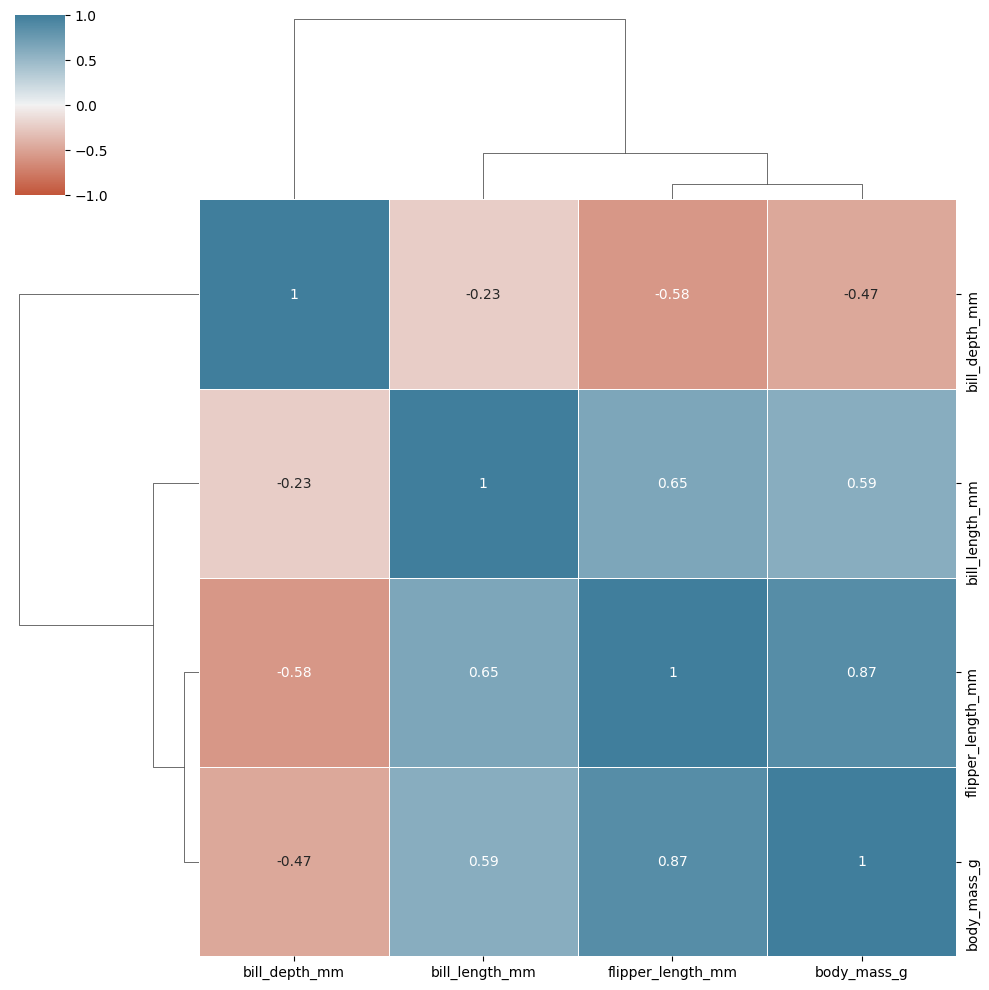

In [4]:
sns.clustermap(
    data=penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

## REGRESIÓN LINEAL ENTRE FLIPPER_LENGTH_MM Y BODY_MASS_G

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

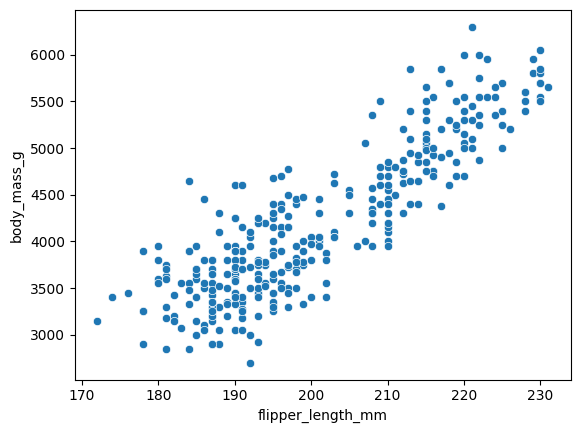

In [5]:
sns.scatterplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g'
)

In [6]:
import scipy

In [7]:
penguins_res = scipy.stats.linregress(x=penguins_df.flipper_length_mm,y=penguins_df.body_mass_g)
penguins_res

LinregressResult(slope=50.15326594224111, intercept=-5872.092682842823, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.5402309838246344, intercept_stderr=310.2851553513498)

## GRAFICAMOS LA REGRESIÓN LINEAL SIMPLE

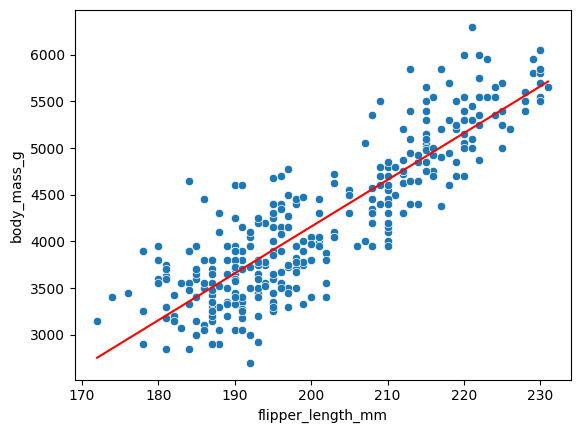

In [8]:
sns.scatterplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g'
)

m = penguins_res.slope
b = penguins_res.intercept

fx_1 = np.array([penguins_df.flipper_length_mm.min(),penguins_df.flipper_length_mm.max()])
fy_1 = m * fx_1 + b

plt.plot(fx_1,fy_1,color='red')


## OTRA FORMA DE GRAFICAR CON SEABORN

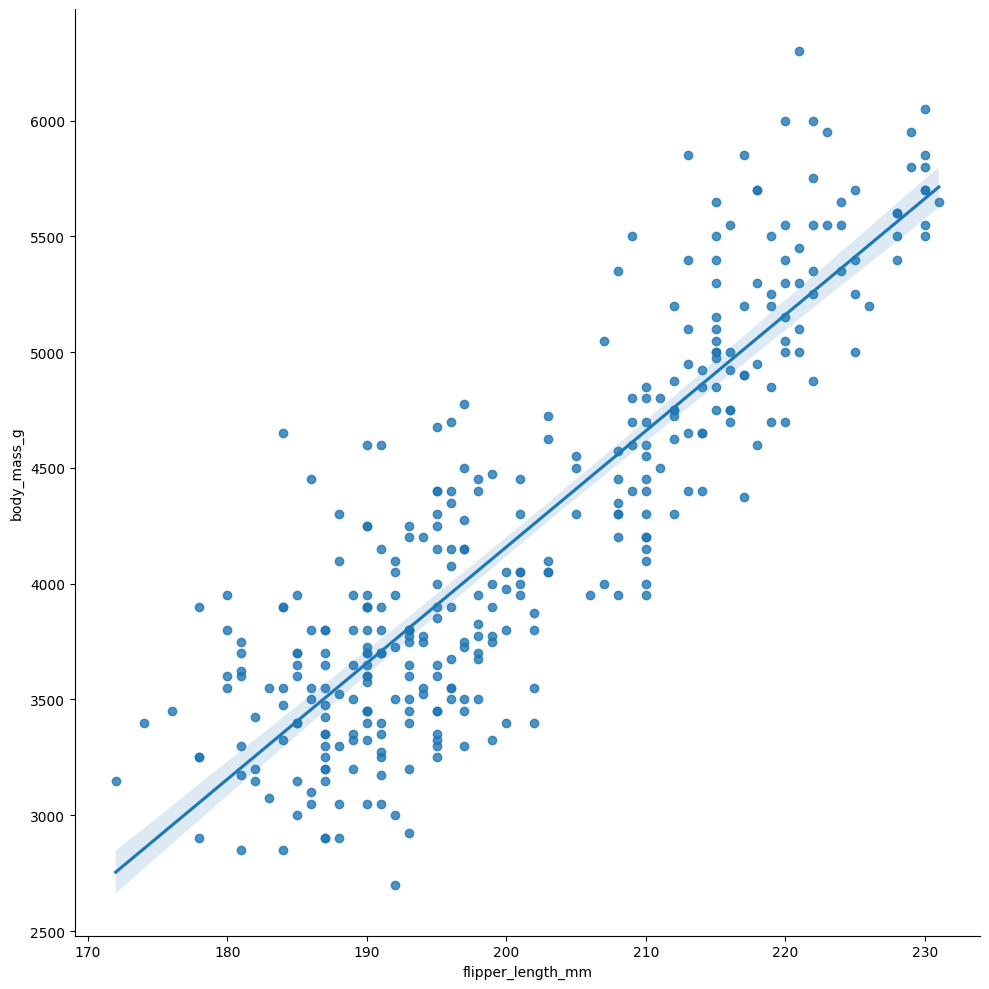

In [9]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10
)